<a href="https://colab.research.google.com/github/TosinFrancis/AAN/blob/main/Supervised_Learning_Regression_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



```
# This is formatted as code
```

<p>Checkpoint Objective
In this checkpoint, we are going to work on the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset that was provided by Kaggle.

Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

 ➡️ Dataset link </p>


 <p>
 <h2>Instructions</h2>
<ol>
<li>Import you data and perform basic data exploration phase</li>
<li>Display general information about the dataset</li>
<li>Create a pandas profiling reports to gain insights into the dataset</li>
<li>Handle Missing and corrupted values</li>
<li>Remove duplicates, if they exist</li>
<li>Handle outliers, if they exist</li>
<li>Encode categorical features</li>
<li>Select your target variable and the features</li>
<li>Split your dataset to training and test sets</li>
<li>Based on your data exploration phase select a ML classification algorithm and train it on the training set
Assess your model performance on the test set using relevant evaluation metrics</li>
<li>Discuss with your cohort alternative ways to improve your model performan</li>
</ol>
</p>

In [ ]:
data = pd.read_csv("/content/5G_energy_consumption_dataset.csv")
data.head(5)

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [ ]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


(None,
              Energy          load        ESMODE       TXpower
 count  92629.000000  92629.000000  92629.000000  92629.000000
 mean      28.138997      0.244705      0.081361      6.765427
 std       13.934645      0.234677      0.382317      0.309929
 min        0.747384      0.000000      0.000000      5.381166
 25%       18.236173      0.057370      0.000000      6.427504
 50%       24.065770      0.165550      0.000000      6.875934
 75%       35.724963      0.363766      0.000000      6.875934
 max      100.000000      0.993957      4.000000      8.375336)

In [ ]:
data.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

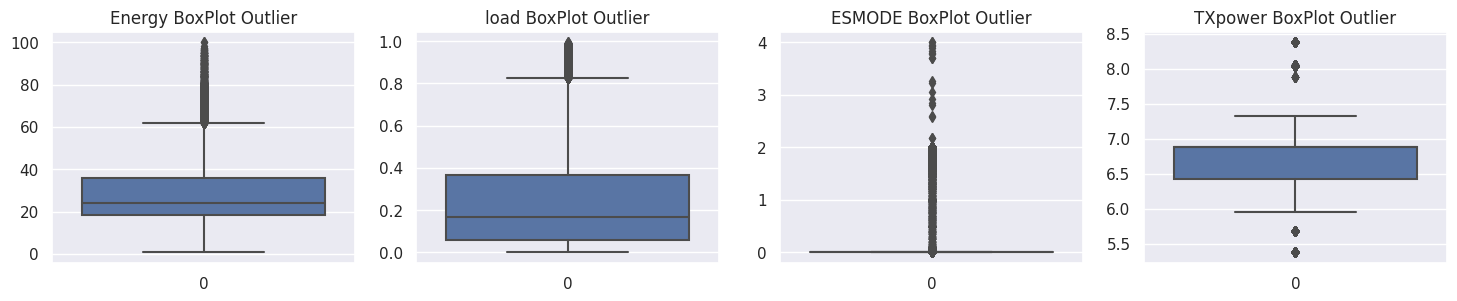

In [ ]:
def outlierChecker(dataframe, columnA, columnB, columnC, columnD):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18,3))
    plt.subplot(1,4,1)
    sns.boxplot(data = dataframe[columnA])
    plt.title(f"{columnA} BoxPlot Outlier")

    plt.subplot(1,4,2)
    sns.boxplot(data = dataframe[columnB])
    plt.title(f"{columnB} BoxPlot Outlier")

    plt.subplot(1,4,3)
    sns.boxplot(data = dataframe[columnC])
    plt.title(f"{columnC} BoxPlot Outlier")

    plt.subplot(1,4,4)
    sns.boxplot(data = dataframe[columnD])
    plt.title(f"{columnD} BoxPlot Outlier")

outlierChecker(data, 'Energy', 'load', 'ESMODE', 'TXpower')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'O':
        data[i] = lb.fit_transform(data[i])

data.head(20)

,Time,BS,Energy,load,ESMODE,TXpower
0,0,0,64.275037,0.487936,0.0,7.101719
1,1,0,55.904335,0.344468,0.0,7.101719
2,2,0,57.698057,0.193766,0.0,7.101719
3,3,0,55.156951,0.222383,0.0,7.101719
4,4,0,56.053812,0.175436,0.0,7.101719
5,6,0,82.959641,0.351585,0.0,7.101719
6,7,0,91.031390,0.759298,0.0,7.101719
7,8,0,78.176383,0.887798,0.0,7.101719
8,9,0,72.645740,0.624745,0.0,7.101719
9,13,0,66.666667,0.437926,0.0,7.101719


In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,1970-01-01 00:00:00.000000000,0,64.275037,0.487936,0.0,7.101719
1,1970-01-01 00:00:00.000000001,0,55.904335,0.344468,0.0,7.101719
2,1970-01-01 00:00:00.000000002,0,57.698057,0.193766,0.0,7.101719
3,1970-01-01 00:00:00.000000003,0,55.156951,0.222383,0.0,7.101719
4,1970-01-01 00:00:00.000000004,0,56.053812,0.175436,0.0,7.101719


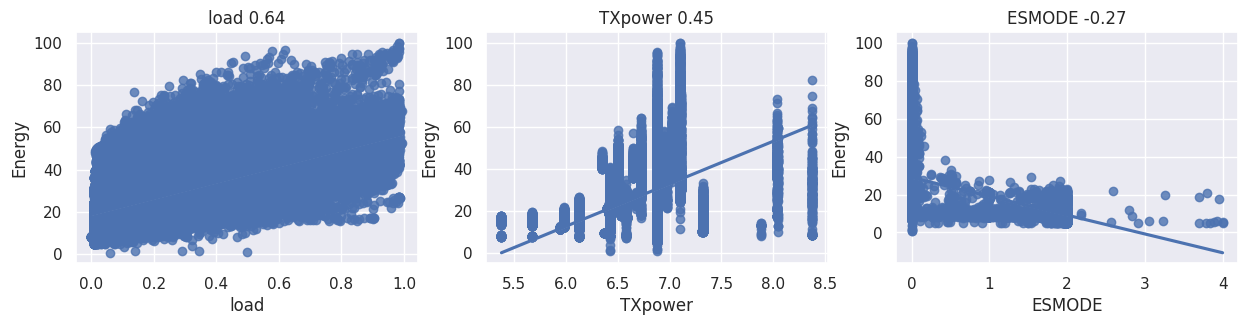

In [ ]:
# Check For Linearity (regplot)
def linearityChecker(dataframe, a,b, c):
    plt.figure(figsize = (15, 3))
    sns.set(style = 'darkgrid')

    plt.subplot(1, 3, 1)
    sns.regplot(x = dataframe[a], y = dataframe['Energy'], ci = 0)
    plt.title(f"{a} {dataframe['Energy'].corr(dataframe[a]).round(2)}")

    plt.subplot(1, 3, 2)
    sns.regplot(x = dataframe[b], y = dataframe['Energy'], ci = 0)
    plt.title(f"{b} {dataframe['Energy'].corr(dataframe[b]).round(2)}")

    plt.subplot(1, 3, 3)
    sns.regplot(x = dataframe[c], y = dataframe['Energy'], ci = 0)
    plt.title(f"{c} {dataframe['Energy'].corr(dataframe[c]).round(2)}")

linearityChecker(data, 'load', 'TXpower', 'ESMODE')

<Axes: >

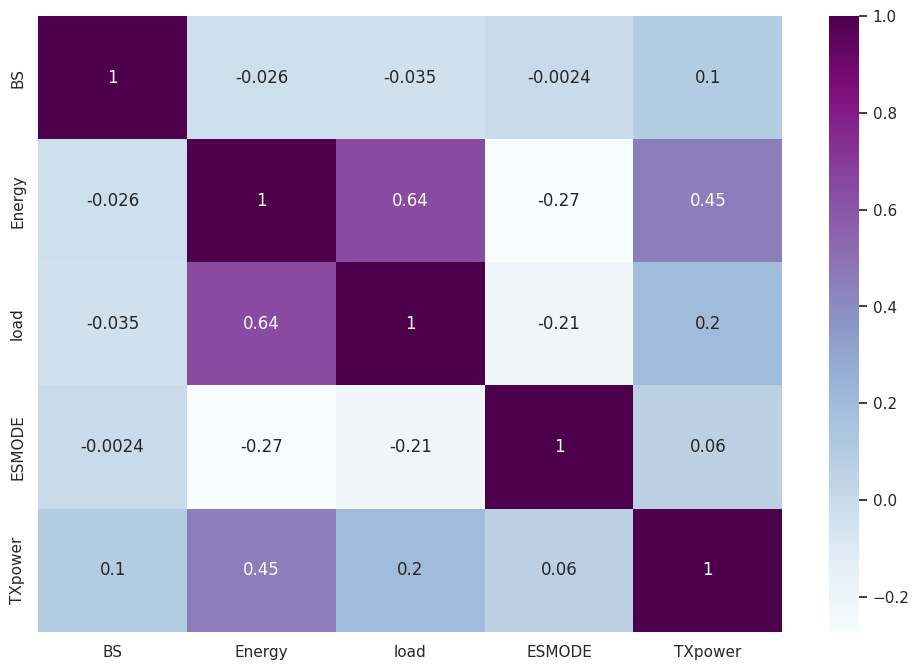

In [ ]:
# Check For Multicolinearity
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True, cmap = 'BuPu')

In [ ]:
# Drop the Categorical Variable
data.drop(['Time', 'BS', 'ESMODE' ], axis = 1, inplace = True)
data.head()

,Energy,load,TXpower
0,64.275037,0.487936,7.101719
1,55.904335,0.344468,7.101719
2,57.698057,0.193766,7.101719
3,55.156951,0.222383,7.101719
4,56.053812,0.175436,7.101719


In [ ]:
x = data.drop('Energy', axis = 1)
y = data['Energy']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20)
print(f"Xtrain: {xtrain.shape}")
print(f"Xtest: {xtest.shape}")
print(f"ytrain: {ytrain.shape}")
print(f"ytest: {ytest.shape}")

Xtrain: (74103, 2)
Xtest: (18526, 2)
ytrain: (74103,)
ytest: (18526,)


In [ ]:
# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lrg = LinearRegression()

lrg.fit(xtrain, ytrain)
train_validation = lrg.predict(xtrain)
train_val_score = r2_score(ytrain, train_validation)

print(f"Accuracy Score on Training is: {train_val_score.round(2)}")

Accuracy Score on Training is: 0.52


In [ ]:
test_prediction = lrg.predict(xtest)
test_val_score = r2_score(ytest, test_prediction)
print(f"Accuracy Score on Testing is: {test_val_score.round(2)}")

Accuracy Score on Testing is: 0.53


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
val = rf.predict(xtrain)
train_val_score = r2_score(ytrain, val)
print(f"Accuracy Score on Testing is: {train_val_score.round(2)}")

Accuracy Score on Testing is: 0.96


In [ ]:
test_prediction = rf.predict(xtest)
test_val_score = r2_score(ytest, test_prediction)
print(f"Accuracy Score on Testing is: {test_val_score.round(2)}")

Accuracy Score on Testing is: 0.81
